In [31]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
import seaborn as sns

In [32]:
house=load_boston()


In [33]:
print(house.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [34]:
x=house.data
y=house.target


In [35]:
df=pd.DataFrame(x,columns=house.feature_names)
df['Target']=pd.DataFrame(y,columns=['Target'])
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

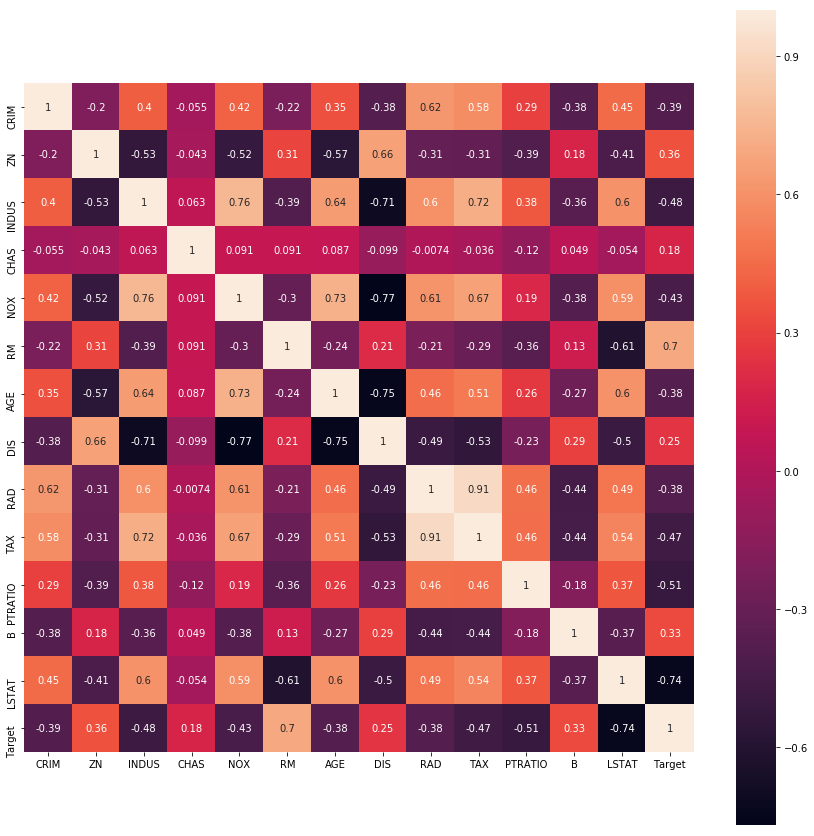

In [36]:
#画热力图，分析各系数相关性
#target相关性最大的是RM,负相关性最大的是穷人的百分比
plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(),annot=True,square=True)

In [37]:
#数据标准化,之前有些数很大，有些数很小，标准化后都转化成0附近的值
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)


In [38]:
print(x[:5])

[[-0.41771335  0.28482986 -1.2879095  -0.27259857 -0.14421743  0.41367189
  -0.12001342  0.1402136  -0.98284286 -0.66660821 -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41526932 -0.48772236 -0.59338101 -0.27259857 -0.74026221  0.19427445
   0.36716642  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.44105193
  -0.49243937]
 [-0.41527165 -0.48772236 -0.59338101 -0.27259857 -0.74026221  1.28271368
  -0.26581176  0.55715988 -0.8678825  -0.98732948 -0.30309415  0.39642699
  -1.2087274 ]
 [-0.41468015 -0.48772236 -1.30687771 -0.27259857 -0.83528384  1.01630251
  -0.80988851  1.07773662 -0.75292215 -1.10611514  0.1130321   0.41616284
  -1.36151682]
 [-0.41040922 -0.48772236 -1.30687771 -0.27259857 -0.83528384  1.22857665
  -0.51117971  1.07773662 -0.75292215 -1.10611514  0.1130321   0.44105193
  -1.02650148]]


In [40]:
#切分数据集
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)#0.3测试集

In [41]:
model=LassoCV()
model.fit(x_train,y_train)
print(model.alpha_)
print(model.coef_)

0.007019609496907561
[-0.77104351  0.62942396  0.28266321  0.61067258 -1.55240423  3.15498577
 -0.28209478 -2.83234256  2.38132756 -2.15452015 -2.19913446  0.74018032
 -3.42889615]


In [29]:
model.score(x_test,y_test)

0.7374783874425832

In [44]:
print(model.predict(x[1,np.newaxis]))

[25.17649846]
